In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/ecom.csv', encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
511142,579472,23570,TRADITIONAL PICK UP STICKS GAME,1.0,11/29/2011 15:09,1.25,13521.0,United Kingdom
511143,579472,22993,SET OF 4 PANTRY JELLY MOULDS,1.0,11/29/2011 15:09,1.25,13521.0,United Kingdom
511144,579472,23251,VINTAGE RED ENAMEL TRIM MUG,1.0,11/29/2011 15:09,1.25,13521.0,United Kingdom
511145,579472,21818,GLITTER HEART DECORATION,4.0,11/29/2011 15:09,0.39,13521.0,United Kingdom


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386271 entries, 0 to 386270
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   InvoiceNo            386271 non-null  object 
 1   StockCode            386271 non-null  object 
 2   Description          386271 non-null  int64  
 3   Quantity             386271 non-null  float64
 4   InvoiceDate          386271 non-null  object 
 5   UnitPrice            386271 non-null  float64
 6   CustomerID           386271 non-null  float64
 7   Country              386271 non-null  int64  
 8   TotalPrice           386271 non-null  float64
 9   TotalAmount          386271 non-null  float64
 10  TotalAmount_annualy  386271 non-null  float64
 11  Log_Annual_Spending  378080 non-null  float64
 12  Country_Encoded      386271 non-null  int64  
dtypes: float64(7), int64(3), object(3)
memory usage: 38.3+ MB


In [28]:
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalAmount,TotalAmount_annualy,Log_Annual_Spending,Country_Encoded
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386266,False,False,False,False,False,False,False,False,False,False,False,False,False
386267,False,False,False,False,False,False,False,False,False,False,False,False,False
386268,False,False,False,False,False,False,False,False,False,False,False,False,False
386269,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0
TotalAmount,0


In [30]:
df = df.dropna()

In [31]:
neg_index = df[(df['Quantity']<0) | (df['UnitPrice']<=0)].index
df = df.drop(neg_index)

In [32]:
df.reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalAmount,TotalAmount_annualy,Log_Annual_Spending,Country_Encoded
0,536365,85123A,3707,6.0,12/1/2010 8:26,2.55,17850.0,35,15.30,15.30,5288.63,2.791165,35
1,536365,71053,3715,6.0,12/1/2010 8:26,3.39,17850.0,35,20.34,20.34,5288.63,3.060583,35
2,536365,84406B,861,8.0,12/1/2010 8:26,2.75,17850.0,35,22.00,22.00,5288.63,3.135494,35
3,536365,84029G,1812,6.0,12/1/2010 8:26,3.39,17850.0,35,20.34,20.34,5288.63,3.060583,35
4,536365,84029E,2767,6.0,12/1/2010 8:26,3.39,17850.0,35,20.34,20.34,5288.63,3.060583,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377759,579472,22620,86,1.0,11/29/2011 15:09,1.45,13521.0,35,1.45,1.45,51.83,0.896088,35
377760,579472,23570,3467,1.0,11/29/2011 15:09,1.25,13521.0,35,1.25,1.25,51.83,0.810930,35
377761,579472,22993,3054,1.0,11/29/2011 15:09,1.25,13521.0,35,1.25,1.25,51.83,0.810930,35
377762,579472,23251,3610,1.0,11/29/2011 15:09,1.25,13521.0,35,1.25,1.25,51.83,0.810930,35


In [33]:
df.describe()

,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice,TotalAmount,TotalAmount_annualy,Log_Annual_Spending,Country_Encoded
count,377764.000000,377764.000000,377764.000000,377764.000000,377764.000000,377764.000000,377764.000000,377764.000000,377764.000000,377764.000000
mean,2019.403426,12.836761,3.137155,15295.457511,32.831424,22.074773,22.074773,10411.539417,2.462282,32.831424
std,1085.386350,128.147751,22.512524,1712.415495,6.738734,158.685974,158.685974,28786.934737,1.016576,6.738734
min,0.000000,1.000000,0.001000,12346.000000,0.000000,0.001000,0.001000,-1165.300000,0.001000,0.000000
25%,1142.000000,2.000000,1.250000,13969.000000,35.000000,4.950000,4.950000,1050.120000,1.783391,35.000000
50%,1978.000000,6.000000,1.950000,15159.000000,35.000000,11.900000,11.900000,2508.890000,2.557227,35.000000
75%,2936.000000,12.000000,3.750000,16794.000000,35.000000,19.800000,19.800000,5845.440000,3.034953,35.000000
max,3886.000000,74215.000000,8142.750000,18287.000000,36.000000,77183.600000,77183.600000,267761.000000,11.253955,36.000000


In [5]:
#Calulating total bill amount
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


EDA AND VISUALISATIONS

In [7]:
top_10_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending = False).head(10).reset_index()
top_10_country

,Country,TotalPrice
0,United Kingdom,7730532.164
1,Netherlands,272814.520
2,EIRE,254359.140
3,Germany,213214.110
4,France,186906.890
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54332.410
8,Belgium,39501.530
9,Sweden,36595.910


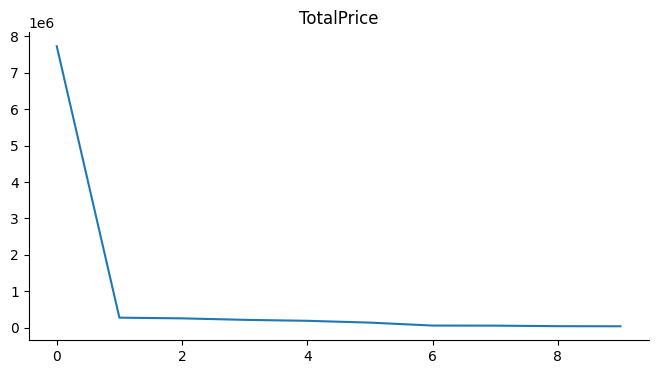

In [34]:
from matplotlib import pyplot as plt
top_10_country['TotalPrice'].plot(kind='line', figsize=(8, 4), title='TotalPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

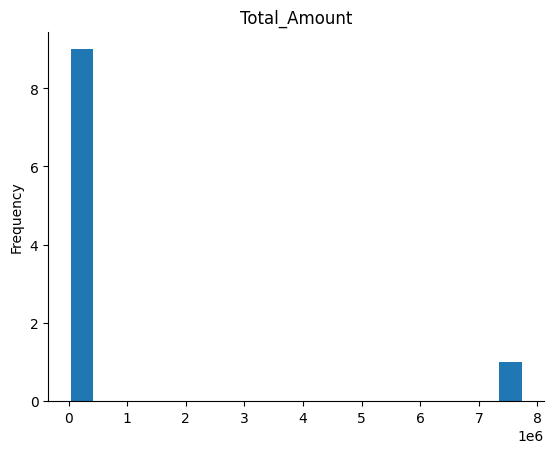

In [36]:
from matplotlib import pyplot as plt
top_10_country['TotalPrice'].plot(kind='hist', bins=20, title='Total_Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 0, 'Quantity')

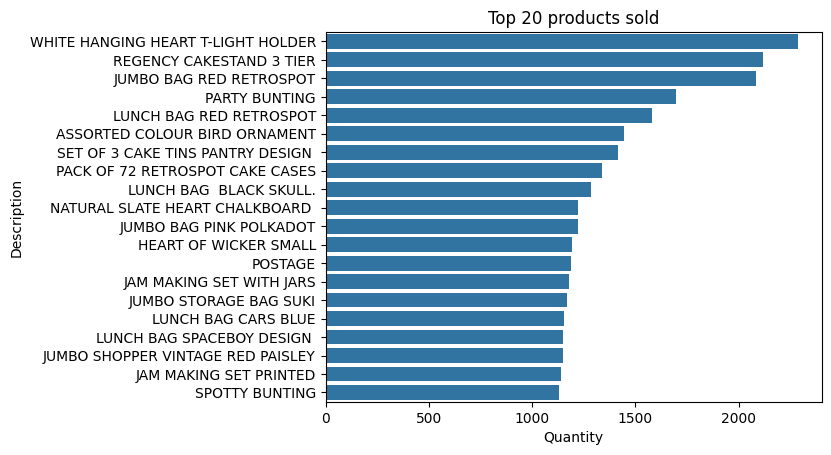

In [9]:
sns.barplot(x = df.Description.value_counts().head(20), y = df.Description.value_counts().head(20).index)
plt.title("Top 20 products sold")
plt.xlabel("Quantity")

Feature Engineering and Data Transformation

In [10]:
# Create a new column 'TotalPrice'
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [11]:
annual_bill = df.groupby('CustomerID')['TotalAmount'].sum()


In [12]:
df= df.merge(annual_bill, on='CustomerID', suffixes=('','_annualy'))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalAmount,TotalAmount_annualy
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,15.30,5288.63
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34,5288.63
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,22.00,5288.63
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34,5288.63
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34,5288.63
...,...,...,...,...,...,...,...,...,...,...,...
386266,579472,22620,4 TRADITIONAL SPINNING TOPS,1.0,11/29/2011 15:09,1.45,13521.0,United Kingdom,1.45,1.45,51.83
386267,579472,23570,TRADITIONAL PICK UP STICKS GAME,1.0,11/29/2011 15:09,1.25,13521.0,United Kingdom,1.25,1.25,51.83
386268,579472,22993,SET OF 4 PANTRY JELLY MOULDS,1.0,11/29/2011 15:09,1.25,13521.0,United Kingdom,1.25,1.25,51.83
386269,579472,23251,VINTAGE RED ENAMEL TRIM MUG,1.0,11/29/2011 15:09,1.25,13521.0,United Kingdom,1.25,1.25,51.83


Data Transformation

In [13]:
df['Log_Annual_Spending'] = np.log1p(df['TotalPrice'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([1.7062e+04, 5.2934e+04, 8.6043e+04, 2.0994e+04, 5.4520e+03,
        8.6100e+02, 1.6300e+02, 2.3000e+01, 1.0000e+00, 2.0000e+00]),
 array([9.99500333e-04, 1.12629507e+00, 2.25159065e+00, 3.37688622e+00,
        4.50218179e+00, 5.62747737e+00, 6.75277294e+00, 7.87806851e+00,
        9.00336409e+00, 1.01286597e+01, 1.12539552e+01]),
 <BarContainer object of 10 artists>)

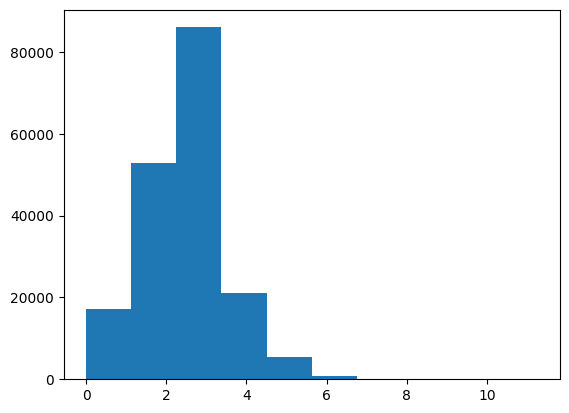

In [ ]:
plt.hist(df['Log_Annual_Spending'])

In [14]:
# Encode categorical variables (Country) using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country_Encoded'] = le.fit_transform(df['Country'])

Predictive Model Building

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error , r2_score

In [15]:
df['Description'] = LabelEncoder().fit_transform(df['Description'])
df['Country'] = LabelEncoder().fit_transform(df['Country'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalAmount,TotalAmount_annualy,Log_Annual_Spending,Country_Encoded
0,536365,85123A,3707,6.0,12/1/2010 8:26,2.55,17850.0,35,15.30,15.30,5288.63,2.791165,35
1,536365,71053,3715,6.0,12/1/2010 8:26,3.39,17850.0,35,20.34,20.34,5288.63,3.060583,35
2,536365,84406B,861,8.0,12/1/2010 8:26,2.75,17850.0,35,22.00,22.00,5288.63,3.135494,35
3,536365,84029G,1812,6.0,12/1/2010 8:26,3.39,17850.0,35,20.34,20.34,5288.63,3.060583,35
4,536365,84029E,2767,6.0,12/1/2010 8:26,3.39,17850.0,35,20.34,20.34,5288.63,3.060583,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386266,579472,22620,86,1.0,11/29/2011 15:09,1.45,13521.0,35,1.45,1.45,51.83,0.896088,35
386267,579472,23570,3467,1.0,11/29/2011 15:09,1.25,13521.0,35,1.25,1.25,51.83,0.810930,35
386268,579472,22993,3054,1.0,11/29/2011 15:09,1.25,13521.0,35,1.25,1.25,51.83,0.810930,35
386269,579472,23251,3610,1.0,11/29/2011 15:09,1.25,13521.0,35,1.25,1.25,51.83,0.810930,35


In [17]:
X = df[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'Log_Annual_Spending', 'Country_Encoded']]
y = df['TotalPrice']


In [20]:
X_train, X_test, y_train,y_test = train_test_split(X, y , test_size=0.25)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(289703, 9)
(96568, 9)
(289703,)
(96568,)


Linear Regression

In [38]:
# Check for missing values in the training set
print(X_train.isnull().sum())


InvoiceNo                 0
StockCode                 0
Description               0
Quantity                  0
UnitPrice                 0
CustomerID                0
Country                   0
Log_Annual_Spending    6149
Country_Encoded           0
dtype: int64


In [40]:
# Drop rows with missing values
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]

# Do the same for the test set
X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test_dropped.index]


In [43]:
import numpy as np

# Check for infinite values in X_train
print(np.isinf(X_train).sum())

# Check for infinite values in X_test
print(np.isinf(X_test).sum())

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# After replacing inf with NaN, you can apply the imputer again
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


InvoiceNo              0
StockCode              0
Description            0
Quantity               0
UnitPrice              0
CustomerID             0
Country                0
Log_Annual_Spending    2
Country_Encoded        0
dtype: int64
InvoiceNo              0
StockCode              0
Description            0
Quantity               0
UnitPrice              0
CustomerID             0
Country                0
Log_Annual_Spending    0
Country_Encoded        0
dtype: int64


In [44]:
# Impute missing values
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model
lin_reg.fit(X_train_imputed, y_train)


LinearRegression()

In [46]:
# Check for NaN values in X_train
print("NaN values in X_train after imputation:", np.isnan(X_train).sum())

# Check for NaN values in X_test
print("NaN values in X_test after imputation:", np.isnan(X_test).sum())

# Re-impute NaN values if any are found
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Alternatively, drop rows with NaN values
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]
X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test_dropped.index]


NaN values in X_train after imputation: InvoiceNo                 0
StockCode                 0
Description               0
Quantity                  0
UnitPrice                 0
CustomerID                0
Country                   0
Log_Annual_Spending    6151
Country_Encoded           0
dtype: int64
NaN values in X_test after imputation: InvoiceNo                 0
StockCode                 0
Description               0
Quantity                  0
UnitPrice                 0
CustomerID                0
Country                   0
Log_Annual_Spending    2042
Country_Encoded           0
dtype: int64


In [48]:
# Calculate performance metrics
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R-Squared:', r2_score(y_train, y_pred_train))


MAE: 16.834881563472585
MSE: 11044.866352825056
RMSE: 105.09455910191096
R-Squared: 0.8103408650430622


In [50]:
# Drop rows with NaN values in the test set
X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test_dropped.index]


In [51]:
# Predict using the test set with NaNs dropped
y_pred = lin_reg.predict(X_test_dropped)

# Evaluate the model
print('MAE:', mean_absolute_error(y_test_dropped, y_pred))
print('MSE:', mean_squared_error(y_test_dropped, y_pred))
print('RMSE:', mean_squared_error(y_test_dropped, y_pred)**0.5)
print('R-Squared:', r2_score(y_test_dropped, y_pred))


MAE: 16.54974574784711
MSE: 3174.014722464926
RMSE: 56.338394745190655
R-Squared: 0.4130892988449242


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Decision Tree

In [52]:
dt_reg = DecisionTreeRegressor(random_state = 123)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [53]:
y_pred_train = dt_reg.predict(X_train)
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R2_LINEAR:', r2_score(y_train, y_pred_train))

MAE: 20.016656205026266
MSE: 34966.186186502164
RMSE: 186.992476283144
R2_LINEAR: 0.3995711298780015


In [54]:
y_pred = dt_reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('R2_LINEAR:', r2_score(y_test, y_pred))

MAE: 19.61432451448929
MSE: 6464.782478346326
RMSE: 80.40387104080453
R2_LINEAR: -0.00010242146251338013


Random Forest Regression

In [76]:
# Use a subset of the data for initial testing
X_train_subset = X_train_imputed[:10000]  # Use the first 10,000 samples
y_train_subset = y_train[:10000]

# Fit the model on the subset
rf_reg.fit(X_train_subset, y_train_subset)


RandomForestRegressor(n_jobs=-1, random_state=123)

In [77]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R-Squared:', r_squared)

MAE: 19.61432451448929
MSE: 6464.782478346326
RMSE: 80.40387104080453
R-Squared: -0.00010242146251338013


Customer Segmentation

In [78]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [88]:
# Rename the column if necessary
new_col = {'TotalSpending_AnnualSpending': 'Annual_Spending'}
df.rename(columns=new_col, inplace=True)

# Get the most recent date from the 'InvoiceDate' column
most_recent_date = df['InvoiceDate'].max()


In [94]:
# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Confirm the type of the most_recent_date
most_recent_date = df['InvoiceDate'].max()
print(type(most_recent_date))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [95]:
# Calculate Recency, Frequency, and Monetary Value
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'MonetaryValue'
}, inplace=True)


In [96]:
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,315,1,77183.60
12347.0,29,6,4085.18
12348.0,65,4,1797.24
12349.0,8,1,1757.55
12350.0,299,1,334.40


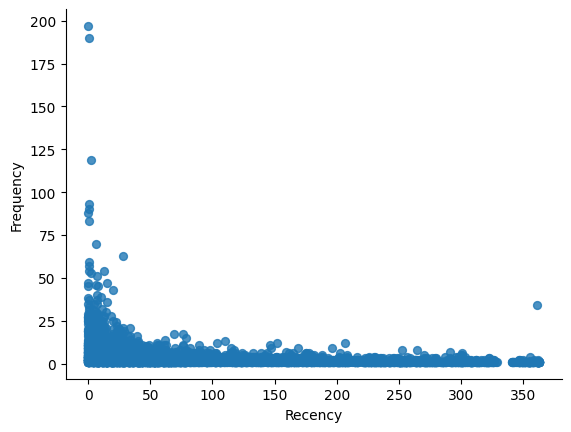

In [97]:
from matplotlib import pyplot as plt
rfm.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [98]:
from sklearn.preprocessing import StandardScaler

# Standardize the RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Convert the scaled data back to a DataFrame for easier handling
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'MonetaryValue'], index=rfm.index)


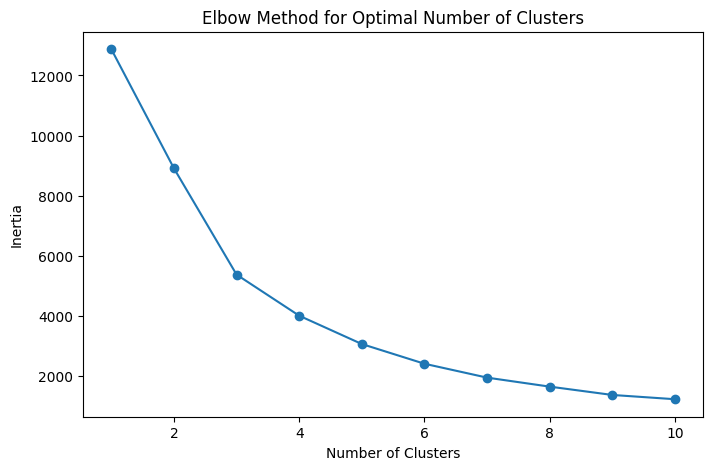

In [100]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [101]:
# Apply K-means clustering
n_clusters = 4  # Replace with the optimal number of clusters from the Elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Display the clusters
print(rfm.head())


            Recency  Frequency  MonetaryValue  Cluster
CustomerID                                            
12346.0         315          1       77183.60        3
12347.0          29          6        4085.18        0
12348.0          65          4        1797.24        0
12349.0           8          1        1757.55        0
12350.0         299          1         334.40        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [104]:
# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
rfm['Agg_Cluster'] = agg_clustering.fit_predict(rfm_scaled)
print("\nAgglomerative Hierarchical Clustering:")
print(rfm['Agg_Cluster'].value_counts())


Agglomerative Hierarchical Clustering:
Agg_Cluster
0    2702
2    1559
1      27
3       3
Name: count, dtype: int64


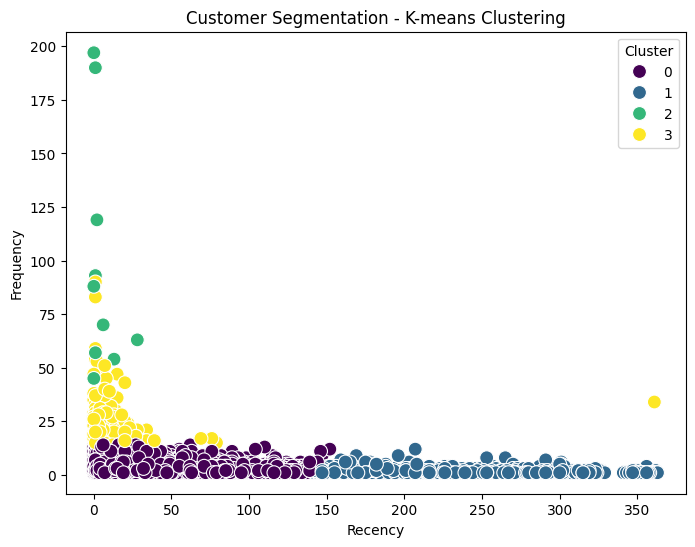

In [106]:
# Scatter plot for Recency vs Frequency (colored by cluster)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation - K-means Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()



Interpretation Results

**High Recency, High Frequency, High Monetary**
Customers in this segment show a high recency, which means their transactions are not recent. Despite this, they are frequent shoppers with a high monetary value, meaning they spend significantly more than other customers. This group represents the most valuable and profitable customers. To keep them engaged and loyal, businesses should implement personalized rewards and exclusive loyalty programs.

**Low Recency, High Frequency, High Monetary**
This group of customers has low recency, indicating they have recently made purchases. They shop frequently and spend a lot, demonstrating both strong loyalty and substantial contribution to revenue. They would benefit from personalized recommendations and targeted loyalty incentives to maintain their engagement and spending.

**High Recency, Low Frequency, Low Monetary**
Customers in this segment have high recency, meaning their last transactions were quite some time ago. They also display low frequency, reflecting that they do not shop regularly, and low monetary value, indicating minimal spending. These customers might be inactive or at risk of churning and could benefit from re-engagement strategies to renew their interest.

**Low Recency, Low Frequency, Low Monetary**
Customers here show low recency, meaning they have recently purchased, but they have low frequency and spend little. This segment includes individuals who have made recent purchases but lack strong loyalty or commitment. They may require targeted offers or incentives to increase their purchasing frequency and overall spending.